<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_OB_week11_1_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4장 딥러닝 시작**

### **4.1** 인공 신경망의 한계와 딥러닝 출현

- 퍼헵트론: 오늘날 신경망(딥러닝) 기원이 되는 알고리즘, 다수의 신호(흐름이 있는) 입력받아 하나의 신호를 출력 => '흐른다/안흐른다(1 또는 0)' 앞으로 전달

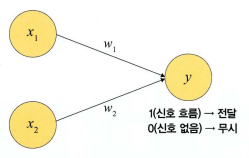



> **AND 게이트**
- 모든 입력이 '1'일 때 작동하는 논리 연산
- 입력 중 어떤 하나라도 '0'을 가지면 작동 중지

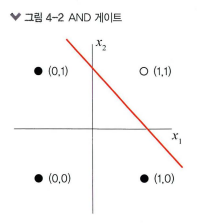



> **OR 게이트**
- 입력에서 둘 중 하나만 '1'이거나 둘 다 '1'일 때 작동하는 논리 연산
- 입력 모두가 '0'을 갖는 경우를 제외한 나머지가 모두 '1'

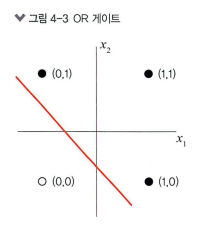



> **XOR 게이트**
- 배타적 논리합
- 입력 두 개 중 한 개만 '1'일 때 작동하는 논리 연산
- 데이터가 비선형적으로 분리되어 제대로 된 분류가 어려움
- 단층 퍼셉트론에서 학습이 불가능

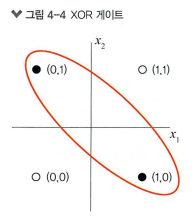

- 다층 퍼셉트론(multi-layer perceptron): 입력층과 출력층 사이에 하나 이상의 중간층(은닉층)을 두어 비선형적으로 분리되는 데이터에 대해 학습이 가능하도록 함
- 심층 신경망(Deep Neural Network, DNN): 입력층과 출력층 사이에 은닉층이 여러 개 있는 신경망 = 딥러닝



---



### **4.2** 딥러닝 구조

##### **4.2.1 딥러닝 용어**

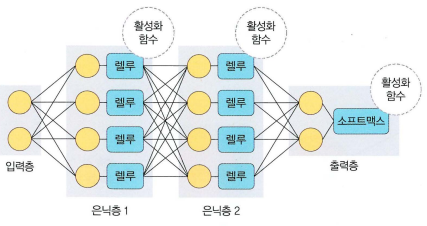

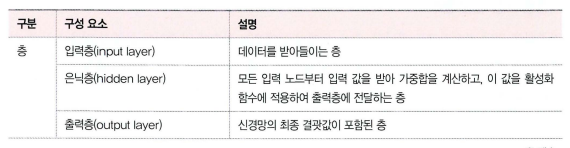
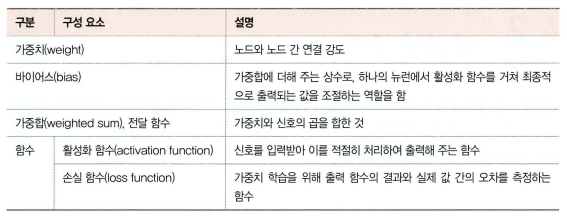



> **가중치**
- 입력 값이 연산 결과에 미치는 영향력을 조절하는 요소
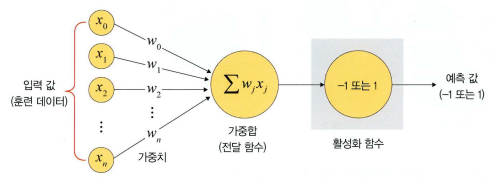



> **가중합 또는 전달 함수(transfer function)**
- 각 노드에서 들어오는 신호에 가중치를 곱해서 다음 노드로 전달되는 값들의 모든 합계
- 노드의 가중합이 계산되면 가중합을 활성화 함수로 보냄 => 전달 함수
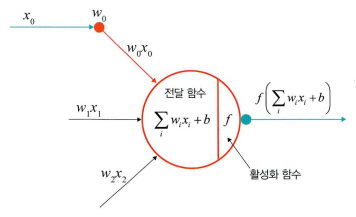
- 가중합 구하는 공식
$$
\sum_{i} w_i x_i + b
$$
$$(w: 가중치, b: 바이어스)$$

**활성화 함수**
- 전달 함수에서 전달받은 값을 출력할 때 일정 기준에 따라 출력 값을 변화시키는 비선형 함수



> *시그모이드 함수*
- 선형 함수의 결과를 0~1 사이에서 비선형 형태로 변형
- 로지스틱 회귀와 같은 분류 문제를 확률적으로 표현하는 데 사용
- '기울기 소멸 문제(vanishing gradient problem)'
$$
f(x) = \frac{1}{1 + e^{-x}}
$$
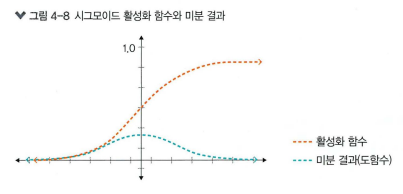



> *하이퍼볼릭 탄젠트 함수*
- 선형 함수의 결과를 -1~1 사이에서 비선형 형태로 변형
- 평균이 0이 아닌 양수로 편향된 문제 해결하지만 기울기 소멸 문제는 여전히 발생
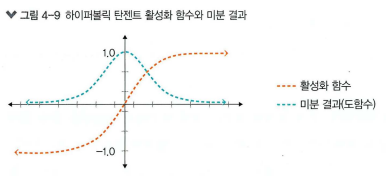




> *렐루 함수*
- 입력($x$)이 음수일 때는 0을 출력, 양수일 때는 $x$를 출력
- 경사 하강법에 영향을 주지 않아 학습 속도가 빠르고, 기울기 소멸 문제가 발생하지 않음
- 은닉층에서 사용, 하이퍼볼릭 탄젠트 함수 대비 학습 속도가 6배 빠름
- 음수 값 입력받으면 항상 0을 출력 => 리키 렐루(Leaky ReLU) 함수
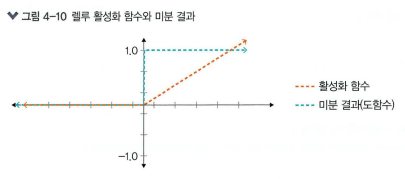




> *리키 렐루 함수*
- 입력 값이 음수이면 0이 아닌 0.001처럼 매우 작은 수를 반환
- 입력 값이 수렴하는 구간 제거
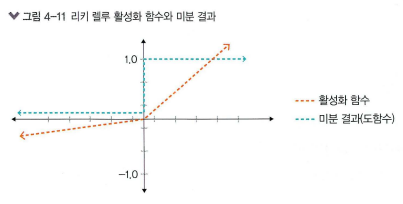





> *소프트맥스 함수*
- 입력 값을 0~1 사이에 출력되도록 정규화하여 출력 값들의 총합이 항상 1이 되도록 함
- 딥러닝에서 출력 노드의 활성화 함수
$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n} \exp(a_i)}
$$
- $n$ = 출력층의 뉴런 개수
- $y_k$ = 그중 $k$번째 출력

In [1]:
import torch
import torch.nn as nn

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  # ------ 은닉층
        self.relu = torch.nn.ReLU(inplace=True)
        self.out = torch.nn.Linear(n_hidden, n_output)      # ------ 출력층
        self.softmax = torch.nn.Softmax(dim=n_output)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)     # ------ 은닉층을 위한 렐루 활성화 함수
        x = self.out(x)
        x = self.softmax(x)  # ------ 출력층을 위한 소프트맥스 활성화 함수
        return x



**손실 함수**
- 학습을 통해 얻은 데이터의 추정치가 실제 데이터와 얼마나 차이가 나는지 평가하는 지표
- 값이 클수록 많이 틀림
- '0'에 가까울수록 완벽하게 추정할 수 있음





> *평균 제곱 오차*
- MSE: 실제 값과 예측 값의 차이(error)를 제곱하여 평균을 낸 것
- 실제 값과 예측 값의 차이가 클수록 평균 제곱 오차의 값이 커짐 => 작을수록 예측력이 좋음
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
  - $\hat{y}_i$:신경망의 출력(신경망이 추정한 값)
  - $y_i$: 정답 레이블
  - $i$: 데이터의 차원 개수


```
import torch

loss_fn = torch.nn.MSELoss(reduction='sum')
y_pred = model(x)
loss = loss_fn(y_pred, y)
```





> *크로스 엔트로피 오차*
- CEE: 분류(classification) 문제에서 원-핫 인코딩(one-hot-encoding) 했을 때 사용할 수 있는 오차 계산법
- 두 개의 확률 분포 차이를 사용하여 시그모이드의 영향을 덜 받음 => 평균 제곱 오차보다 학습 속도가 빠름
$$
\text{CrossEntropy} = - \sum_{i=1}^{n} y_i \log\hat{y}_i
$$
  - $\hat{y}_i$:신경망의 출력(신경망이 추정한 값)
  - $y_i$: 정답 레이블
  - $i$: 데이터의 차원 개수


```
loss = nn.CrossEntropyLoss()
input = torch.randn(5, 6, requires_grad=True)   # 평균이 0이고 표준편차가 1인 가우시안 정규분포
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)   # dtype torch.float32의 랜덤한 값으로 채워진 텐서 반환
output.backward()
```



##### **4.2.2 딥러닝 학습**

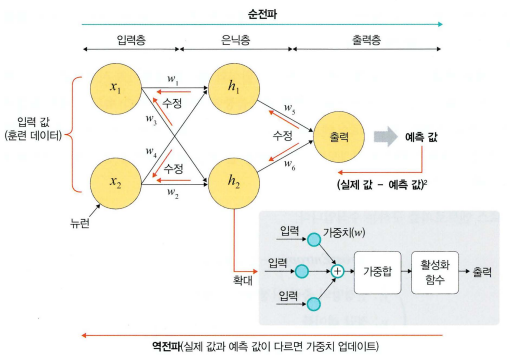

1. **순전파**(feedforward):네트워크에 훈련 데이터가 들어올 때 발생, 데이터를 기반으로 예측 값을 계산하기 위해 전체 신경망을 교차해 지나감
  - 모든 뉴런이 이전 층의 뉴런에서 수신한 정보에 변환(가중합 및 활성화 함수)을 적용하여 다음 층(은닉층)의 뉴런으로 전송
  - 네트워크를 통해 입력 데이터를 전달
  - 데이터가 모든 층을 통과하고 모든 뉴런이 계산을 완료하면 그 예측 값은 최종 층(출력층)에 도달
2. **역전파**(backpropagation): 손실(오차)이 계산되면 그 정보는 역으로 전파(출력층⭢은닉층⭢입력층)
  - 손실 함수 비용이 0에 가깝도록 하기 위해 모델이 훈련을 반복하면서 가중치를 조정

##### **4.2.3 딥러닝의 문제점과 해결 방안**

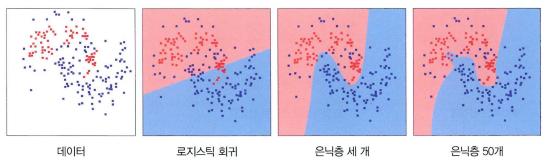

은닉층이 많을수록 생기는 문제점



> **과적합 문제 발생**
- 과적합(over-fitting): 훈련 데이터에 대해 과하게 학습하여 실제 데이터에 대한 오차가 증가하는 현상
  - 예측 값과 실제 값 차이인 오차가 감소
  - 검증 데이터에 대해서는 오차가 증가
  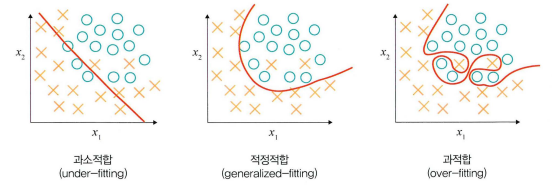
  - 해결 방법: 드롭아웃(dropout) => 신경망 모델이 과적합되는 것을 피하기 위한 방법, 학습 과정 중 임의로 일부 노드들을 학습에서 제외
  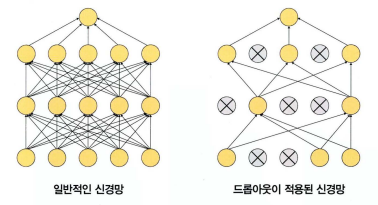

In [3]:
class DropoutModel(torch.nn.Module):
    def __init__(self):
        super(DropoutModel, self).__init__()
        self.layer1 = torch.nn.Linear(784, 1200)
        self.dropout1 = torch.nn.Dropout(0.5)    # 50%의 노드를 무작위로 선택하여 사용하지 않겠다는 의미
        self.layer2 = torch.nn.Linear(1200, 1200)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.layer3 = torch.nn.Linear(1200, 10)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = self.dropout1(x)
        x = F.relu(self.layer2(x))
        x = self.dropout2(x)
        return self.layer3(x)



> **기울기 소멸 문제 발생**
- 출력층에서 은닉층으로 전달되는 오차가 크게 줄어들어 학습이 되지 않는 현상
- 기울기가 소멸되기 때문에 학습되는 양이 '0'에 가까워져 학습이 더디게 진행되다 오차를 더 줄이지 못하고 그 상태로 수렴
- 렐루 활성화 함수 사용하여 해결 가능
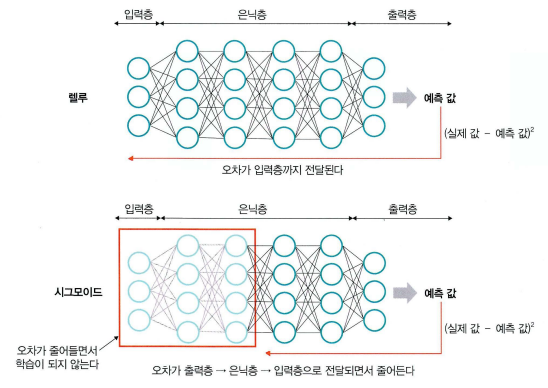




> **성능이 나빠지는 문제 발생**
- 경사 하강법이 손실 함수의 비용이 최소가 되는 지점을 찾을 때까지 기울기가 낮은 쪽으로 계속 이동시키는 과정을 반복하여 성능이 나빠짐
- 문제점 개선: 확률적 경사 하강법, 미니 배치 경사 하강법
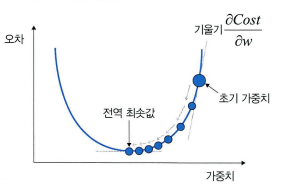




> 경사 하강법
- 경사 하강법의 유형
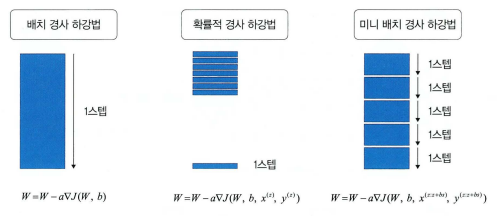
- **배치 경사 하강법**(Batch Gradient Descent, BGD):
  - 전체 데이터셋에 대한 오류를 구한 후 기울기를 한 번만 계산하여 모댈의 파라미터를 업데이트 하는 방법
  - 전체 훈련 데이터셋(total training descent)에 대해 가중치를 편미분하는 방법
$$
W = W - a  \nabla J(W, b)
$$
$$(a: 학습률, J: 손실 함수)$$
- **확률적 경사 하강법**(Stochastic Gradient Descent, SGD):
  - 임의로 선택한 데이터에 대해 기울기를 계산하는 방법
  - 적은 데이터를 사용하여 빠른 계산이 가능
  - 파라미터 변경 폭이 불안정, 배치 경사 하강법보다 정확도가 늦을 수 있음
- **미니 배치 경사 하강법**(mini-batch gradient descent):
  - 미니 배치 여러개로 나누고, 미니 배치 한 개마다 기울기를 구한 후 그것의 평균 기울기를 이용하여 모델을 업데이트해서 학습
  

```
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[1,2,3], [4,5,6], [7,8,9]]
        self.y_data = [[12], [18], [11]]
        def __len__(self):
            return len(self.x_data)
        def __getitem__(self, idx):
            x = torch.FloatTensor(self.x_data[idx])
            y = torch.FloatTensor(self.y_data[idx])
            return x, y
dataset = CustomDataset()
dataloader = DataLoader(dataset,       # 데이터셋
                        batch_size=2,  # 미니 배치 크기로 2의 제곱수를 사용하겠다는 의미
                        shuffle=True)  # 데이터를 불러올 때마다 랜덤으로 섞어서 가져옴
```



##### **4.2.4 딥러닝을 사용할 때 이점**



> **특성 추출**(feature extraction)
- 컴퓨터가 입력받은 데이터를 분석하여 일정한 패턴이나 규칙을 찾아내기 위해 사람이 인지하는 데이터를 컴퓨터가 인지할 수 있는 데이터로 변환하는 작업
- 데이터별로 어떤 특징을 갖고 있는지 찾아내고, 데이터를 벡터로 변환하는 작업



> **빅데이터의 효율적 활용**
- 딥러닝 학습을 이용한 특성 추출은 데이터 사례가 많을수록 성능이 향상
- 확보된 데이터가 적다면 머신러닝을 고려



---



### **4.3** 딥러닝 알고리즘

##### **4.3.1 심층 신경망**
- 심층 신경망(DNN): 입력층과 출력층 사이에 다수의 은닉층을 포함하는 인공 신경망
- 다수의 은닉층 => 다양한 비선형적 관계 학습 가능
- 학습량을 위한 연산량이 많고 기울기 소멸 문제 발생 가능

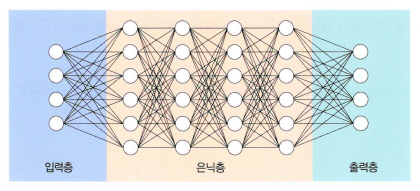

##### **4.3.2 합성곱 신경망**
- 합성곱 신경망(Convolutional Neural Network, CNN): 합성곱층(convolutional layer), 풀링층(pooling layer) 포함하는 이미지 처리 성능이 좋은 인공 신경망 알고리즘
- 영상, 사진이 포함된 이미지 데이터에서 객체를 탐색하거나 객체 위치를 찾아내는 데 유용한 신경망
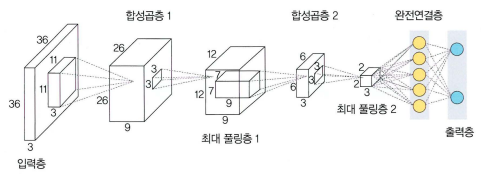

- 대표적인 합성곱 신경망: LeNet-5, AlexNet
- 층을 더 깊게 쌓은 신경망: VGG, GoogLeNet, ResNet

##### **4.3.3 순환 신경망**

- 순환 신경망(Recurrent Neural Network, RNN): 시계열 데이터(음악, 영상 등) 같은 시간 흐름에 따라 변화하는 데이터를 학습하기 위한 인공 신경망

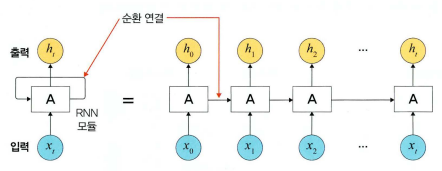

- 시간성(temporal property)을 가진 데이터가 많음
- 시간성 정보를 이용하여 데이터의 특징을 잘 다룸
- 시간에 따라 내용이 변함 => 데이터가 동적, 길이가 가변적
- 매우 긴 데이터를 처리하는 연구가 활발히 진행

##### **4.3.4 제한된 볼츠만 머신**

- 볼츠만 머신(Boltzmann machine): 가시층(visible layer), 은닉층(hidden layer)로 구성된 모델
- *제한된 볼츠만 머신*(Resticted Boltzmann Machine, RBM): 위 모델에서 가시층이 은닉층과만 연결된 머신
  - 차원 감소, 분류, 선형 회귀 분석, 협업 필터링, 특성 값 학습, 주제 모델링에 사용
  - 기울기 소멸 문제 해결을 위해 사전 학습 용도로 활용 가능
  - 심층 신뢰 신경망(DBN)의 요소로 활용

##### **4.3.5 심층 신뢰 신경망**
- 심층 신뢰 신경망(Deep Belief Network, DBN): 입력층과 은닉층으로 구성된 제한된 볼츠만 머신을 블록처럼 여러 층으로 쌓은 형태로 연결된 신경망
- 사전 훈련된 제한된 볼츠만 머신을 츨츨히 쌓아 올려 레이블이 없는 데이터에 대한 비지도 학습이 가능
  - 학습 절차
  1. 가시층과 은닉층 1에 제한된 볼츠만 머신을 사전 훈련
  2. 첫 번째 층 입력 데이터와 파라미터를 고정하여 두 번째 층 제한된 볼츠만 머신을 사전 훈련
  3. 원하는 층 개수만큼 제한된 볼츠만 머신을 쌓아 올려 전체 DBN을 완성
  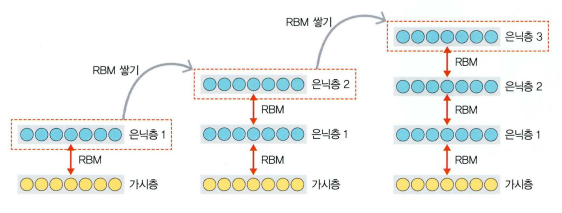
  - 특징
    - 순차적으로 심층 신뢰 신경망을 학습시켜 가면서 계층적 구조를 생성
    - 비지도 학습으로 학습
    - 위로 올라갈수록 추상적 특성을 추출
    - 학습된 가중치를 다중 퍼셉트론의 가중치 초깃값으로 사용



---



### **4.4** 우리는 무엇을 배워야 할까?
- 간단한 선형 회귀 분류를 이용하여 원하는 값을 도출할 수 있다면? 머신 러닝만으로도 충분
- 복잡한 비선형 데이터에 대한 분류 및 예측을 도출하고 싶다면? 딥러닝으로 학습
  - 데이터를 활용하여 얻고자 하는 것에 따라 머신 러닝/딥러닝을 선택하여 학습, 데이터를 훈련
  - 다음 장 >> 딥러닝 도구, 활용법 자세히 알아보기 !